## Media Company

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Reading the dataframe:

In [3]:
#reading the file
show_df = pd.read_csv('mediacompany.csv')
show_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
#dropping the unnecessary column
show_df = show_df.drop(['Unnamed: 7'], axis =1)

In [5]:
show_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [6]:
#shape of the dataframe
show_df.shape

(80, 7)

In [7]:
#info of the dataframe
show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


Let us convert `Date` column to Date datatype.

In [8]:
# converting into datetime datatype
show_df['Date'] = pd.to_datetime(show_df['Date'])

In [9]:
#rechecking the data
show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


#### Visualizing the dataframe:

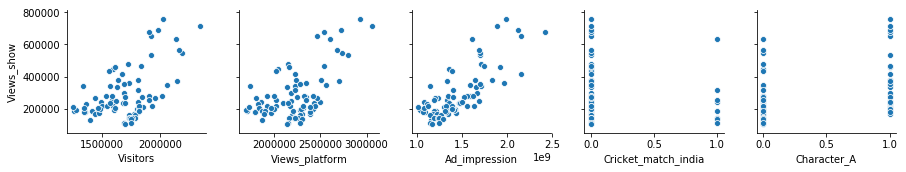

In [10]:
sns.pairplot(x_vars = ['Visitors','Views_platform','Ad_impression','Cricket_match_india','Character_A'], y_vars = 'Views_show', data = show_df)

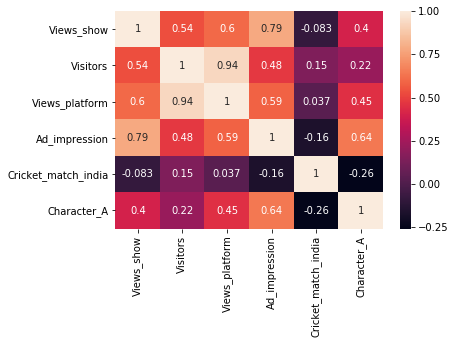

In [11]:
sns.heatmap(show_df.corr(), annot = True)

We can see some strong correlation between Viwes_show and Ad_impression and negative correlation between Views_show and Cricket_match_india.

#### Feature extraction:

In [12]:
# Let us extract the number of days- the show has been running
from datetime import date

d0 =date(2017,2,28)
d1 = show_df['Date'].dt.date
delta = d1 -d0
show_df['Days'] = delta

In [13]:
show_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [14]:
show_df['Days'] = show_df['Days'].astype(str)

In [15]:
# extracting only the number
show_df['Days'] = show_df['Days'].map(lambda x :x[0:2])
show_df['Days'] = show_df['Days'].astype(int)

In [16]:
show_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [17]:
# creating day of the week
show_df['day_of_the_week'] = show_df['Date'].map(lambda x : x.weekday())

In [18]:
show_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,day_of_the_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6


In [19]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i == 5: return 1
    elif i == 6: return 1
    else :return 0
    return i

show_df['weekend']=[cond(i) for i in show_df['day_of_the_week']]

In [20]:
show_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,day_of_the_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1


In [21]:
# Let us create lag views variable:
show_df['Views_show'][-1:]

79    108961
Name: Views_show, dtype: int64

In [22]:
show_df['Lag_views'] = np.roll(show_df['Views_show'],1)
show_df['Lag_views'][0] = 0

In [23]:
show_df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Days,day_of_the_week,weekend,Lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1,240061


#### Let us further visualize:

<Figure size 720x720 with 0 Axes>

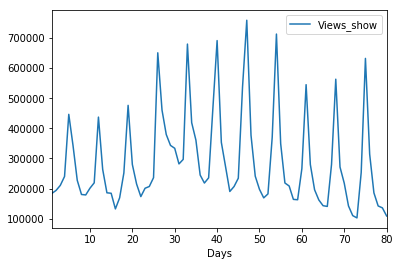

In [24]:
plt.figure(figsize = (10,10))
show_df.plot.line(x = 'Days', y='Views_show')

We see that show views increased in between but slowly started to decrease.

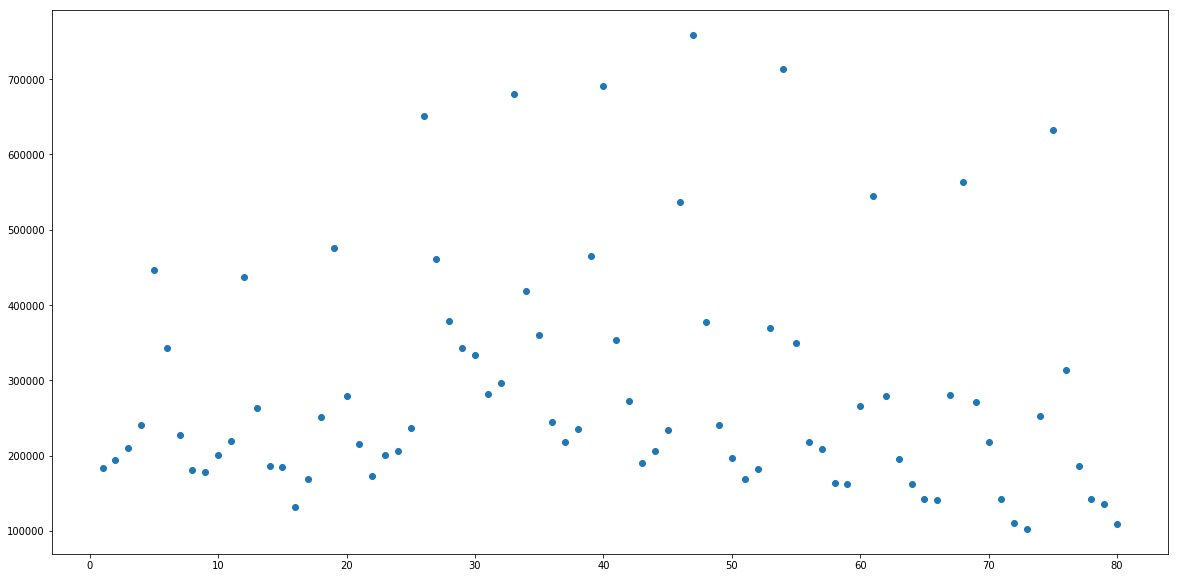

In [25]:
plt.figure(figsize = (20,10))
plt.scatter(x = 'Days', y='Views_show', data = show_df)

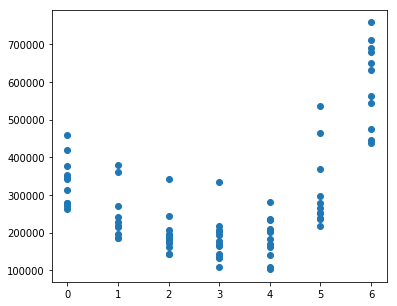

In [26]:
plt.figure(figsize = (6,5))
plt.scatter(x = 'day_of_the_week', y='Views_show', data = show_df)

We see that mostly on the weekdays there is a drop in the views and on weekends there is a sharp raise in the views.

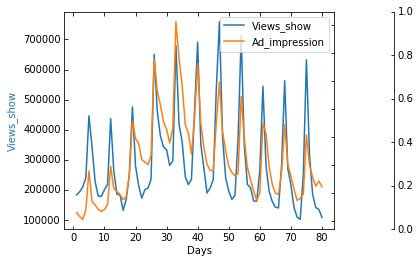

In [27]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("Days")
host.set_ylabel("Views_show")
par1.set_ylabel("Ad_impression")


p1, = host.plot(show_df.Days, show_df.Views_show, label="Views_show")
p2, = par1.plot(show_df.Days , show_df.Ad_impression , label="Ad_impression")

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

In [28]:
#Ad impression in million
show_df['ad_impression_million'] = show_df['Ad_impression']/1000000
show_df = show_df.drop(['Ad_impression'], axis =1)
show_df.head()

,Date,Views_show,Visitors,Views_platform,Cricket_match_india,Character_A,Days,day_of_the_week,weekend,Lag_views,ad_impression_million
0,2017-03-01,183738,1260228,1706478,0,0,1,2,0,0,1060.860448
1,2017-03-02,193763,1270561,1690727,0,0,2,3,0,183738,1031.846645
2,2017-03-03,210479,1248183,1726157,0,0,3,4,0,193763,1010.867575
3,2017-03-04,240061,1492913,1855353,1,0,4,5,1,210479,1079.194579
4,2017-03-05,446314,1594712,2041418,0,0,5,6,1,240061,1357.736987


####  As the data is too low, we are not dividing the data into test train split.Ideally, we should be doing boot strap method for lesser amount of data. But let us go ahead without one and try:

In [29]:
df_train = show_df[:]

In [30]:
df_train.shape

(80, 11)

#### Model Building:

Let us build the model by adding each variable one at a time.

#### Model1:

To start with let us check 'Visitors' variable impact on 'Views_show'.
The first question we are trying to answer is whether the decline in Visitors to the platform the main reason for the decline in the show viewership:

In [31]:
y = df_train.pop('Views_show')
X = df_train

In [32]:
X = X.drop(['Date'], axis =1)

In [33]:
X = X[['Visitors']]

In [34]:
X_sm = sm.add_constant(X)
lr_1 = sm.OLS(y,X_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     31.33
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           3.12e-07
Time:                        16:04:35   Log-Likelihood:                -1055.6
No. Observations:                  80   AIC:                             2115.
Df Residuals:                      78   BIC:                             2120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.197e+05    1.1e+05     -2.909      0.0

We see positive co-efficient. So let us add 'weekend' variable and check the impact.

#### Model 2:

In [35]:
X_1 = df_train[['Visitors', 'weekend']]

In [36]:
X1_sm = sm.add_constant(X_1)
lr_2 = sm.OLS(y,X1_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           2.51e-12
Time:                        16:04:35   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_1.columns
vif['VIF'] =  [variance_inflation_factor(X_1.values,i) for i in range(X_1.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,weekend,1.489822
0,Visitors,1.489822


Both these variables have positive impact on the show's views.

#### Model 3:

In [38]:
X_2 = df_train[['Visitors', 'weekend','Character_A']]

In [39]:
X2_sm = sm.add_constant(X_2)
lr_3 = sm.OLS(y,X2_sm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.53e-14
Time:                        16:04:35   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] =  [variance_inflation_factor(X_2.values,i) for i in range(X_2.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Visitors,2.102099
2,Character_A,1.662932
1,weekend,1.492662


Adj. R-squared of the model has increased and VIF of all the variables are below 5%.

#### Model 4:

In [41]:
X_3 = df_train[['Visitors', 'weekend','Character_A', 'Lag_views']]

In [42]:
X3_sm = sm.add_constant(X_3)
lr_4 = sm.OLS(y,X3_sm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           3.16e-21
Time:                        16:04:35   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_3.columns
vif['VIF'] =  [variance_inflation_factor(X_3.values,i) for i in range(X_3.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Visitors,6.213453
3,Lag_views,5.469698
2,Character_A,1.832041
1,weekend,1.637599


Now suddenly Visitors variable has become insignificant. So Let us remove Visitors and check with Views_platform. And also Lag_views variable is difficult to explain to business, so let us not use that variable.

#### Model 5:

In [44]:
X_4 = df_train[['weekend','Character_A', 'Views_platform']]

In [45]:
X4_sm = sm.add_constant(X_4)
lr_5 = sm.OLS(y,X4_sm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           3.59e-15
Time:                        16:04:35   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_4.columns
vif['VIF'] =  [variance_inflation_factor(X_4.values,i) for i in range(X_4.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Views_platform,2.184133
1,Character_A,1.746743
0,weekend,1.475028


Adj. R-squared dropped. So let us go back to our old model, model number 3.

#### Model 6:

In [47]:
X_5 = df_train[['Visitors', 'weekend','Character_A', 'ad_impression_million']]

In [48]:
X5_sm = sm.add_constant(X_5)
lr_6 = sm.OLS(y,X5_sm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.10e-25
Time:                        16:04:35   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.834e+

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_5.columns
vif['VIF'] =  [variance_inflation_factor(X_5.values,i) for i in range(X_5.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,ad_impression_million,46.973276
0,Visitors,39.777523
2,Character_A,2.536118
1,weekend,1.493270


Now, both visitors and Character_A has become insignificant. So let us drop visitor first and check.

#### Model 7:

In [50]:
X_6 = df_train[['weekend','Character_A', 'ad_impression_million']]

In [51]:
X6_sm = sm.add_constant(X_6)
lr_7 = sm.OLS(y,X6_sm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.05e-26
Time:                        16:04:35   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_6.columns
vif['VIF'] =  [variance_inflation_factor(X_6.values,i) for i in range(X_6.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,ad_impression_million,2.482368
1,Character_A,1.974476
0,weekend,1.482283


Character A is still insignificant.Let us drop that.

#### Model 8:

In [53]:
X_7 = df_train[['weekend','ad_impression_million']]

In [54]:
X7_sm = sm.add_constant(X_7)
lr_8 = sm.OLS(y,X7_sm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.95e-27
Time:                        16:04:35   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

All the variables looks fine in this model. But we are left with one variable - Cricket_match_india. Let us just check that column.

#### Model 9:

In [55]:
X_8 = df_train[['weekend','ad_impression_million','Cricket_match_india']]

In [56]:
X8_sm = sm.add_constant(X_8)
lr_9 = sm.OLS(y,X8_sm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     99.93
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           2.64e-26
Time:                        16:04:35   Log-Likelihood:                -1005.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      76   BIC:                             2028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.277e+

Looks like variable Cricket_match_india is highly insignificant. So let us drop this variable and go with our precious model with variables -weekend and ad_impression_million 

#### Final model -10:

In [57]:
X_9 = df_train[['weekend','ad_impression_million']]

In [58]:
X9_sm = sm.add_constant(X_9)
lr_10 = sm.OLS(y,X9_sm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.95e-27
Time:                        16:04:35   Log-Likelihood:                -1005.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      77   BIC:                             2023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.302e+

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_9.columns
vif['VIF'] =  [variance_inflation_factor(X_9.values,i) for i in range(X_9.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,weekend,1.481735
1,ad_impression_million,1.481735


#### Model 10 is our final model.

#### Residual analysis:

In [60]:
y_train_pred = lr_10.predict(X9_sm)

In [61]:
y_train = y

In [62]:
res = y_train - y_train_pred

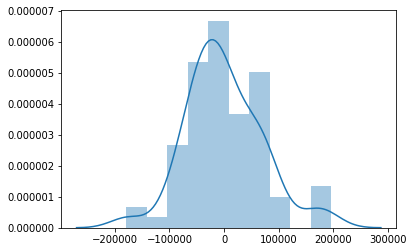

In [63]:
#distribution of error term
sns.distplot(res, bins=10)

The residuals is normally distributed with a mean zero.

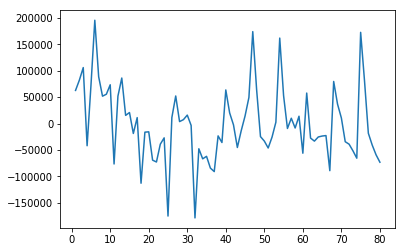

In [64]:
#looking for pattern in error term
c =[i for i in range(1,81,1)]
plt.plot(c, res)

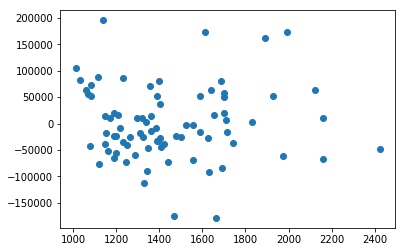

In [65]:
plt.scatter(X_9.iloc[:,1],res)

There is a wave type of pattern in the error. This means, probably this model is not able to explain all of the variance.

#### Predictions on the test data:

In [66]:
X_test = show_df[['weekend','ad_impression_million']]

In [67]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr_10.predict(X_test_sm)

In [68]:
y_pred.head()

0    120974.253158
1    111370.704322
2    104426.646582
3    282125.368142
4    374322.713596
dtype: float64

In [69]:
y_pred.shape

(80,)

In [70]:
y.shape

(80,)

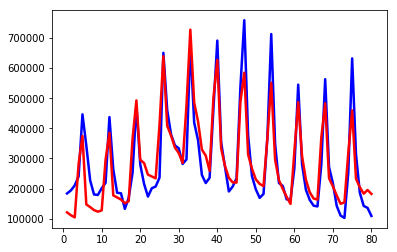

In [71]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")

We see a almost perfect merging of actual and predicted values.

#### Metrics:

In [72]:
#RMSE
RMSE =np.sqrt(mean_squared_error(y, y_pred))
RMSE

69262.10550383548

In [73]:
#r2_score
r_squ = r2_score(y, y_pred)
r_squ

0.7975978797926214

Let do the same predictions on our model 3. Model 3 was with variables -'weekend','Character_A' and 'Visitors'. This is just to check how character A has an impact on the model.

#### Residual analysis with Model 7

#### Predictions on the test data using Model 3:

In [74]:
X_test_model_3 = show_df[['weekend','Visitors','Character_A']]

X_test_model_3_sm = sm.add_constant(X_test_model_3)

y_pred_model_3 = lr_3.predict(X_test_model_3_sm)

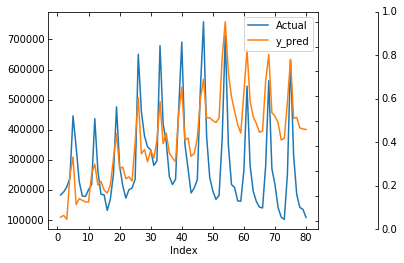

In [83]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("Index")
#host.set_ylabel("Views_show")
#par1.set_ylabel("y_pred")
c = [i for i in range(1,81,1)]


p1, = host.plot(c, show_df.Views_show, label="Actual")
p2, = par1.plot(c , y_pred_model_3 , label="y_pred")

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

In this model we see that though the model is able to follow the pattern of actual data, it is not able to explain sharp highs and lows.

So we have two model:

1. Model 10 - Variables: 'weekend' and 'ad_impression_million'
2. Model 3 - Variables: 'weekend','Visitors' and 'Character_A'.

A good model tells a good story. It is not important that you base your story entirely on a single model.

Variable 'weekend' is something which is not in our control. And 'visitors' and 'ad_impression_million' are highly correlated. So we can keep either of it. As 'ad_impression_million' can be regulated, let us consider 'ad_impression_million'.

So Ad Impressions and Character A are the driver variables that could be used to increase the viewership of the show. Ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, a better viewership could be achieved. Similarly, Character A’s absence and presence create a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables can be acted upon to improve the show viewership.